# Cr Price Prediction


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("car data.csv")

In [4]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# check Missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Check Duplication

df.duplicated().sum()

2

In [8]:
#Check datatype

df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [9]:
# Check the number of unique values of each column

df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [10]:
#Check statistics of data set

df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
# checking the distribution of categorical data

print(df.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [12]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
df['Selling_Price'] = df['Selling_Price'].astype(int)

In [15]:
df['Present_Price'] = df['Present_Price'].astype(int)


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       301 non-null    object
 1   Year           301 non-null    int64 
 2   Selling_Price  301 non-null    int32 
 3   Present_Price  301 non-null    int32 
 4   Driven_kms     301 non-null    int64 
 5   Fuel_Type      301 non-null    int64 
 6   Selling_type   301 non-null    int64 
 7   Transmission   301 non-null    int64 
 8   Owner          301 non-null    int64 
dtypes: int32(2), int64(6), object(1)
memory usage: 18.9+ KB


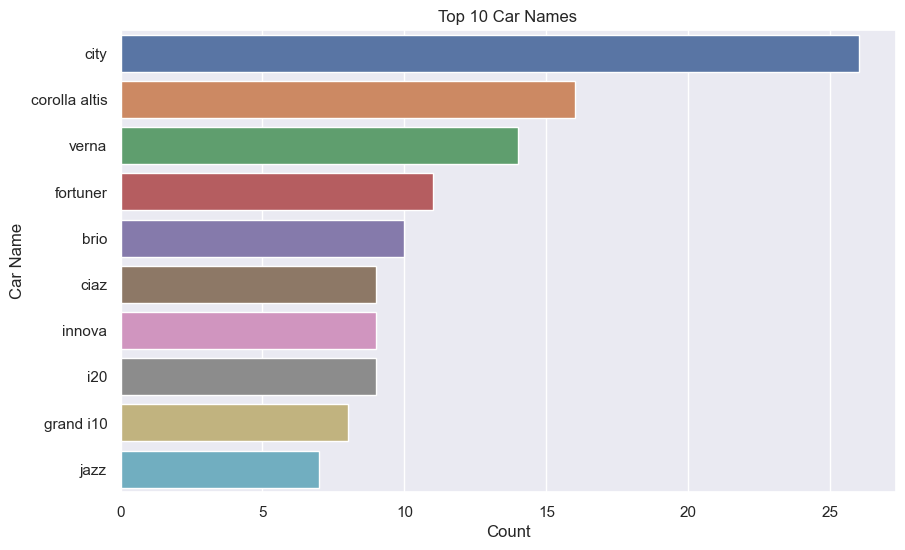

In [17]:
# Bar chart for Car_Name
plt.figure(figsize=(10, 6))
sns.countplot(y='Car_Name', data=df, order=df['Car_Name'].value_counts().index[:10])
plt.title('Top 10 Car Names')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.show()

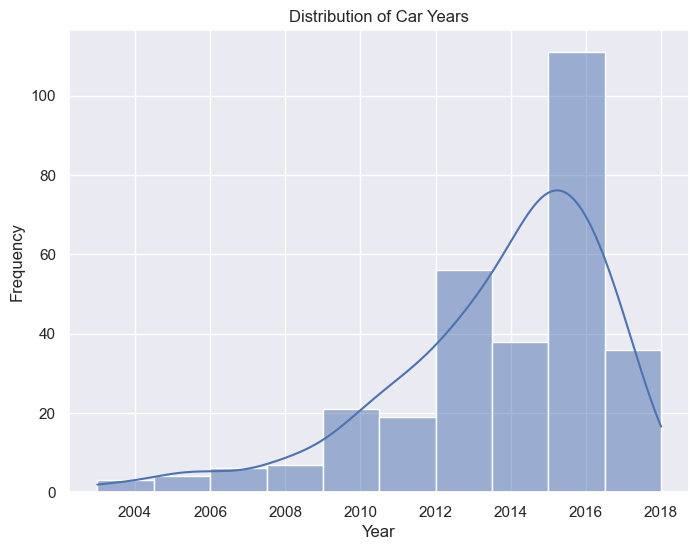

In [18]:
# Histogram for Year
plt.figure(figsize=(8, 6))
sns.histplot(df['Year'], bins=10, kde=True)
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

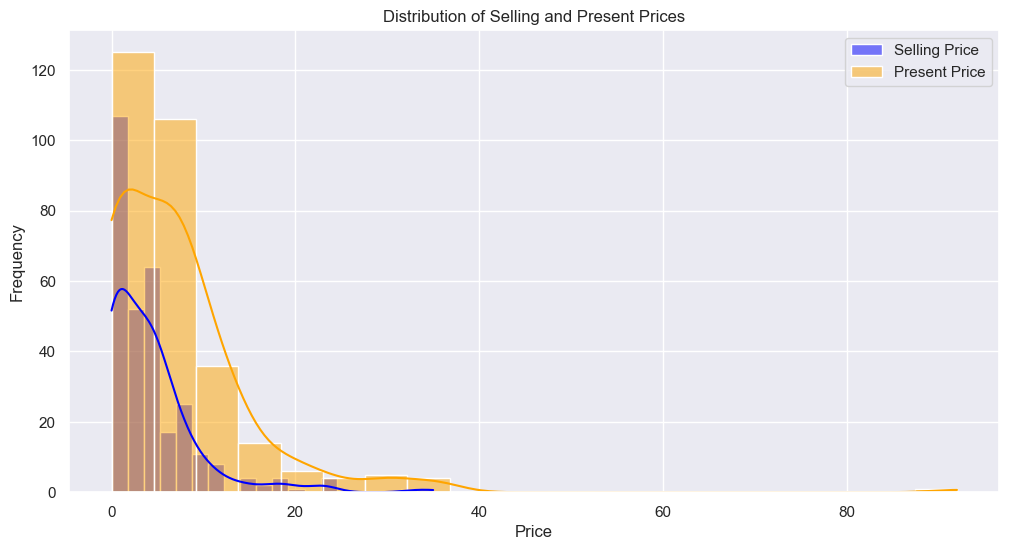

In [19]:
# Histogram for Selling_Price and Present_Price
plt.figure(figsize=(12, 6))
sns.histplot(df['Selling_Price'], bins=20, kde=True, color='blue', label='Selling Price')
sns.histplot(df['Present_Price'], bins=20, kde=True, color='orange', label='Present Price')
plt.title('Distribution of Selling and Present Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

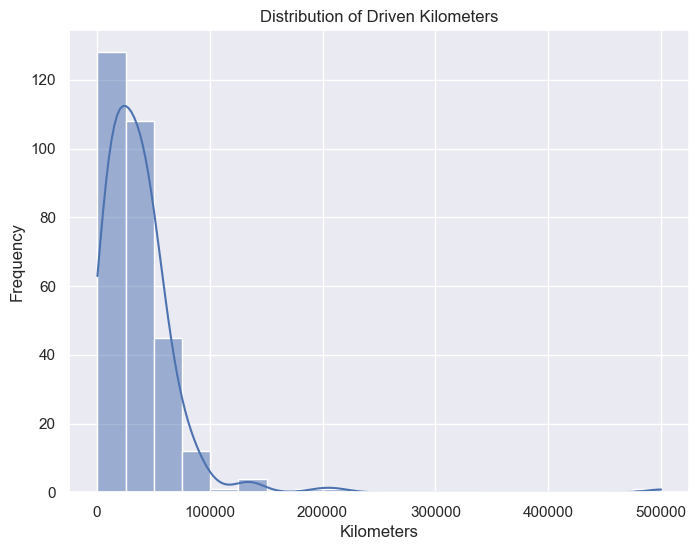

In [20]:
# Histogram for Driven_kms
plt.figure(figsize=(8, 6))
sns.histplot(df['Driven_kms'], bins=20, kde=True)
plt.title('Distribution of Driven Kilometers')
plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.show()


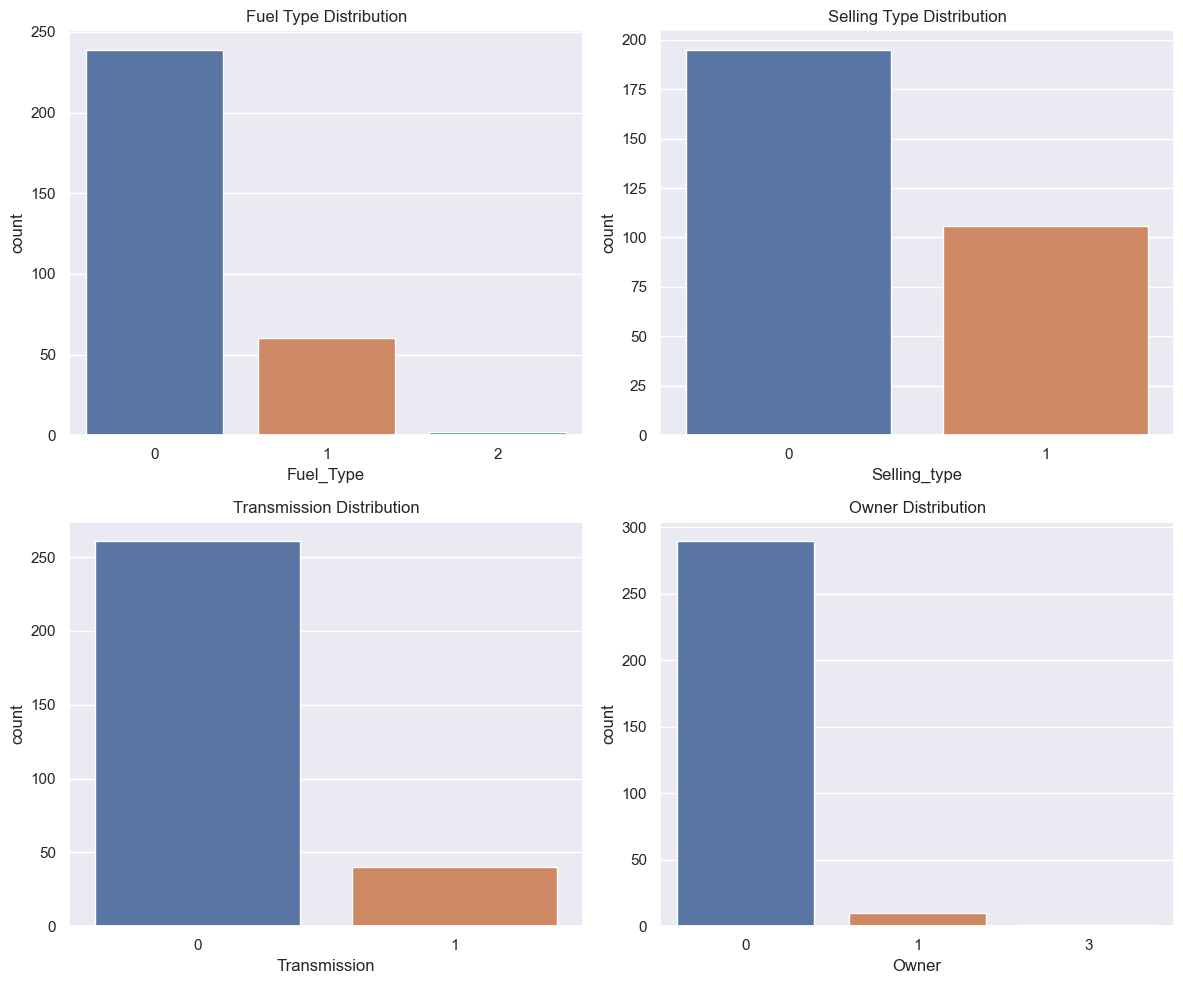

In [21]:
# Bar chart for Fuel_Type, Selling_type, Transmission, Owner
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='Fuel_Type', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Fuel Type Distribution')

sns.countplot(x='Selling_type', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Selling Type Distribution')

sns.countplot(x='Transmission', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Transmission Distribution')

sns.countplot(x='Owner', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Owner Distribution')

plt.tight_layout()
plt.show()

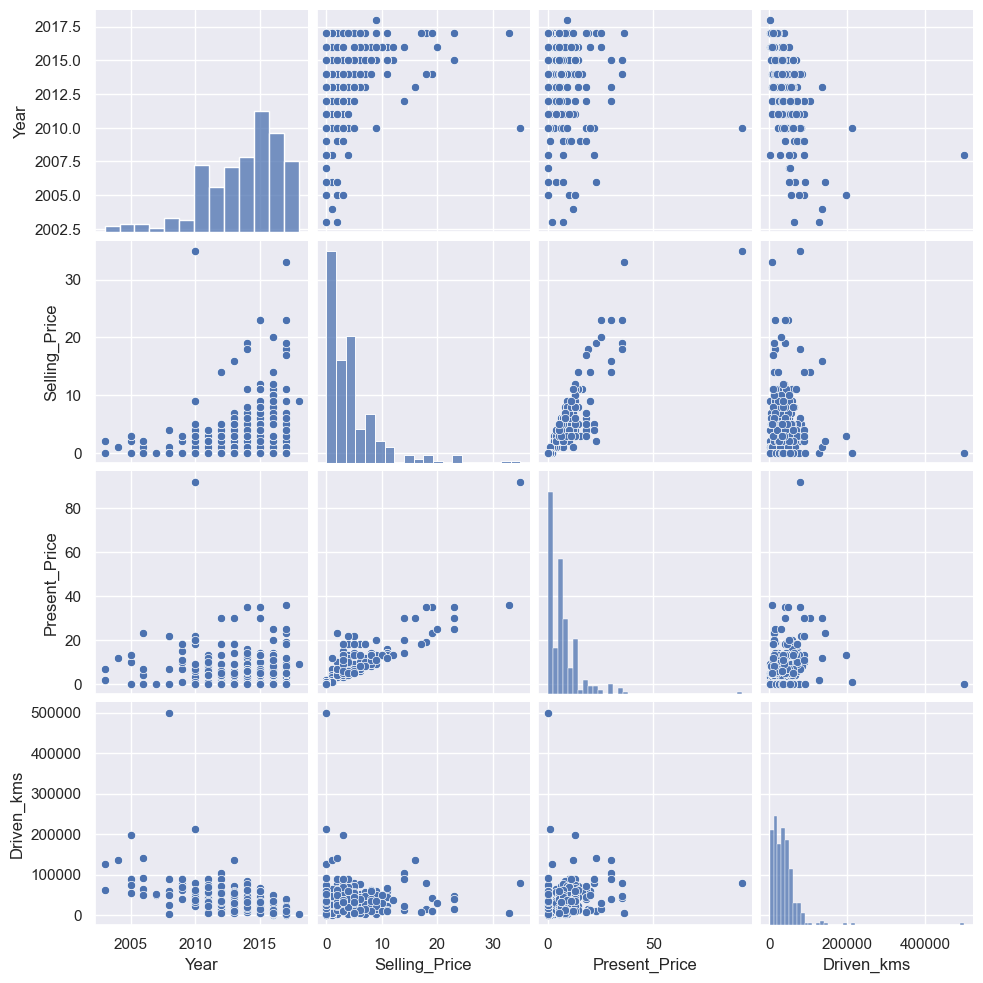

In [22]:
# Select columns for pairplot
columns_for_pairplot = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']

# Create pairplot
sns.pairplot(df[columns_for_pairplot])
plt.show()

In [23]:
x = df.drop(['Car_Name','Selling_Price','Year'],axis=1)
y = df['Selling_Price']

In [24]:
### Importing the dependencies

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score

In [25]:
### Machine Learning models Libraries: 

from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold,cross_val_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [32]:
#Splitting Training and Test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=52)
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
def compare_models_train_test():
    for model in models:
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        
        # Calculate regression metrics
        mse = mean_squared_error(y_test, y_predicted)
        r2 = r2_score(y_test, y_predicted)
        mae = mean_absolute_error(y_test, y_predicted)
        accuracy = accuracy_score(y_test,y_predicted)
        precision = precision_score(y_test,y_predicted,average='macro')
        
        # Calculate cross-validation score
        cv_scores = cross_val_score(model, np.vstack((x_train, x_test)), np.hstack((y_train, y_test)), cv=5, scoring='neg_mean_squared_error')
        
        print("Model:", model)
        print("Mean Squared Error (MSE):", mse)
        print("R-squared (R2):", r2)
        print("Mean Absolute Error (MAE):", mae)
        print("Cross-Validation Score:", -cv_scores.mean())
        print("Accuracy - ",accuracy)
        print("Precision - ",precision)
        print("="*50)

In [33]:
compare_models_train_test()


Model: LogisticRegression(max_iter=1000)
Mean Squared Error (MSE): 11.262295081967213
R-squared (R2): 0.5117100111856823
Mean Absolute Error (MAE): 1.6229508196721312
Cross-Validation Score: 22.73426229508197
Accuracy -  0.4098360655737705
Precision -  0.16653061224489796
Model: DecisionTreeClassifier()
Mean Squared Error (MSE): 1.6065573770491803
R-squared (R2): 0.9303458240119313
Mean Absolute Error (MAE): 0.7540983606557377
Cross-Validation Score: 5.074644808743169
Accuracy -  0.5245901639344263
Precision -  0.4071428571428572
Model: RandomForestClassifier()
Mean Squared Error (MSE): 1.9344262295081966
R-squared (R2): 0.9161306860551827
Mean Absolute Error (MAE): 0.7868852459016393
Cross-Validation Score: 5.125737704918032
Accuracy -  0.5573770491803278
Precision -  0.39603174603174607
Model: KNeighborsClassifier()
Mean Squared Error (MSE): 27.950819672131146
R-squared (R2): -0.2118405108128263
Mean Absolute Error (MAE): 3.5245901639344264
Cross-Validation Score: 36.33125683060109
A

Conclusion :-
The RandomForestClassifier emerges as the best model for car price prediction. It exhibits the lowest Mean Squared Error (MSE) and Cross-Validation Score, indicating better predictive performance. Moreover, it achieves the highest Accuracy and Precision scores, indicating superior classification performance compared to other models.